> Based on the project by [SYSTEMSound](https://github.com/SYSTEMSounds/sonification-tutorials) 
## 1) Load data (.csv file)

In [3]:
import pandas as pd   #import library for loading data, https://pypi.org/project/pandas/

filename = 'bilkent_twitter'  #name of csv data file

df = pd.read_csv('./data/' + filename + '.csv',on_bad_lines='skip')  #load data as a pandas dataframe


df = df.sort_values(by=['time'], ascending=False)
#sorting data from newest to oldest tweet 


716 Mentions


,Tweet Id,Text,Name,Screen Name,UTC,time,Favorites,Retweets,Language,Client,Tweet Type,URLs,Hashtags,Mentions,Media Type,Media URLs,Unnamed: 16,Unnamed: 17,Unnamed: 18
320,1530058131656658944,@ttllol_ Bilkent Türkiye'nin top okullarından....,Melis,nthreallymatter,2022-05-27 05:27:40.000,Fri May 27 05:27:40 +0000 2022,0,0,tr,"<a href=""http://twitter.com/download/android"" ...",Reply,NaN,0,1,NaN,NaN,NaN,NaN,NaN
321,1530054162372825088,"RT @MustafaAlperen : Panel: ""Türkiye, AB Döngü...",M.Alperen Özdemir,MustafaAlperen,2022-05-27 05:11:53.000,Fri May 27 05:11:53 +0000 2022,0,0,tr,"<a href=""http://twitter.com/download/iphone"" r...",Retweet,NaN,2,0,photo,https://pbs.twimg.com/media/FTr9jMPWUAM70s2.jpg,https://pbs.twimg.com/media/FTr9jMaX0AE7A5x.jpg,NaN,NaN
322,1530042774866669568,@quantumcatto i can confirm bilkent stockholm ...,berfie @ 🌙🌃 brainrot,berfieglyph,2022-05-27 04:26:39.000,Fri May 27 04:26:39 +0000 2022,2,0,en,"<a href=""https://mobile.twitter.com"" rel=""nofo...",Reply,NaN,0,1,NaN,NaN,NaN,NaN,NaN
323,1529998609810341890,RT @dogilibira : Hazırlanmak için stüdyolara b...,Görkem Özdemir,GrkmZdmr0,2022-05-27 01:31:09.000,Fri May 27 01:31:09 +0000 2022,0,0,tr,"<a href=""http://twitter.com/download/android"" ...",Retweet,https://twitter.com/speletura/status/152993000...,0,0,photo,https://pbs.twimg.com/media/FTtup9TXwBYWRPC.jpg,NaN,NaN,NaN
324,1529985829577404419,RT @genemach1ne : Bilkent'i ilk günden özlüyor...,Inji,InjiNovruz,2022-05-27 00:40:22.000,Fri May 27 00:40:22 +0000 2022,0,0,tr,"<a href=""http://twitter.com/download/iphone"" r...",Retweet,NaN,0,0,NaN,NaN,NaN,NaN,NaN


## 2) Plot data

['2022-05-25 22:27:23.000 ', '2022-05-25 22:25:51.000 ', '2022-05-25 22:13:17.000 ', '2022-05-25 22:09:46.000 ', '2022-05-25 22:06:23.000 ', '2022-05-25 21:45:40.000 ', '2022-05-25 21:13:01.000 ', '2022-05-25 20:46:10.000 ', '2022-05-25 20:40:35.000 ', '2022-05-25 20:28:27.000 ', '2022-05-25 20:22:18.000 ', '2022-05-25 20:10:26.000 ', '2022-05-25 20:05:55.000 ', '2022-05-25 20:02:35.000 ', '2022-05-25 20:01:07.000 ', '2022-05-25 19:58:21.000 ', '2022-05-25 19:50:27.000 ', '2022-05-25 19:49:31.000 ', '2022-05-25 19:44:26.000 ', '2022-05-25 19:32:45.000 ', '2022-05-25 19:30:46.000 ', '2022-05-25 19:23:06.000 ', '2022-05-25 19:22:27.000 ', '2022-05-25 19:21:11.000 ', '2022-05-25 19:20:27.000 ', '2022-05-25 19:12:36.000 ', '2022-05-25 18:56:07.000 ', '2022-05-25 18:43:34.000 ', '2022-05-25 18:42:19.000 ', '2022-05-25 18:40:55.000 ', '2022-05-25 18:35:39.000 ', '2022-05-25 18:27:18.000 ', '2022-05-25 18:22:55.000 ', '2022-05-25 18:18:03.000 ', '2022-05-25 18:10:25.000 ', '2022-05-25 18:06:5

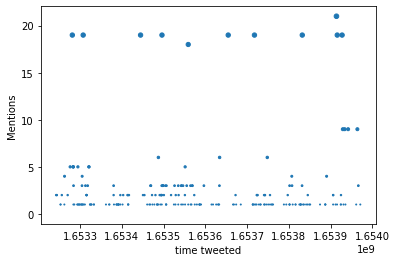

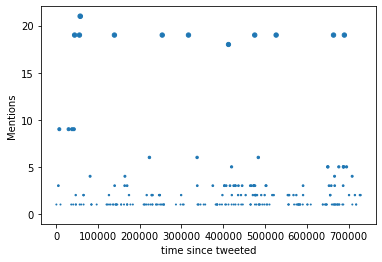

In [4]:
import matplotlib.pylab as plt  
import numpy as np

import datetime
import time
import calendar
import datetime
 



ages = df['UTC'].values    
ages=ages.tolist()
print(ages)
for i in range(len(ages)):
    print(i)
    ages[i]=ages[i].replace("-", " ").replace(":"," ").replace(".000","").replace(" ","")
    print(ages[i])
    ages[i] = datetime.datetime.strptime(ages[i], '%Y%m%d%H%M%S')
    ages[i] = ages[i].timestamp()
    


diameters = df['Mentions'].values 
plt.scatter(ages, diameters, s=diameters)
plt.xlabel('time tweeted')
plt.ylabel('Mentions')
plt.show()


times_myrs = max(ages) - np.array(ages)  #measure time from oldest crater (first impact) in data

plt.scatter(times_myrs, diameters, s=diameters)
plt.xlabel('time since tweeted')
plt.ylabel('Mentions')
plt.show()




## 3) Write general mapping function

In [5]:
def map_value(value, min_value, max_value, min_result, max_result):
    '''maps value (or array of values) from one range to another'''
    
    result = min_result + (value - min_value)/(max_value - min_value)*(max_result - min_result)
    return result


## 4) Compress time


### option 1: set a conversion factor to compress time

In [6]:
myrs_per_beat = 25  #number of Myrs for each beat of music 

t_data = times_myrs/myrs_per_beat #rescale time from Myrs to beats


duration_beats = max(t_data)  #duration in beats (actually, onset of last note)
print('Duration:', duration_beats, 'beats')



Duration: 29148.4 beats


### option 2: set a desired duration (in beats)

In [7]:
duration_beats = 52.8 #desired duration in beats (actually, onset of last note)

t_data = map_value(times_myrs, 0, max(times_myrs), 0, duration_beats)

#or
#t_data = map_value(ages, min(ages), max(ages), duration_beats, 0)

myrs_per_beat = max(times_myrs)/duration_beats
print('Myrs per beat:', myrs_per_beat)

Myrs per beat: 13801.325757575758


Duration: 52.8 seconds


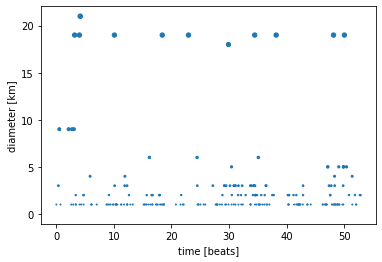

In [8]:
#calculate duration in seconds
bpm = 60  #if bpm = 60, 1 beat = 1 sec 
duration_sec = duration_beats*60/bpm #duration in seconds (actually, onset of last note)
print('Duration:', duration_sec, 'seconds')


plt.scatter(t_data, diameters, s=diameters)
plt.xlabel('time [beats]')
plt.ylabel('mentions')
plt.show()

## 4) Normalize and scale data

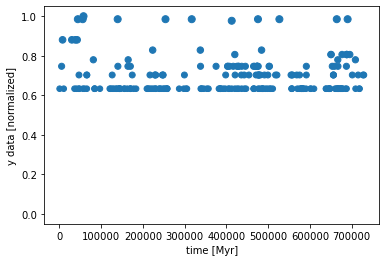

In [20]:

y_data = map_value(diameters, min(diameters), max(diameters), 0, 1) #normalize data, so it runs from 0 to 1 

y_scale = 0.15  #lower than 1 to spread out more evenly

y_data = y_data**y_scale

plt.scatter(times_myrs, y_data, s=50*y_data)
plt.xlabel('time [Myr]')
plt.ylabel('y data [normalized]')
plt.show()


## 6) Choose musical notes for pitch mapping, convert to midi numbers



In [21]:
from audiolazy import str2midi #import function to convert note names to midi numbers (could also use: midi2str, str2freq, freq2str,freq2midi,midi2freq) https://pypi.org/project/audiolazy/



#4 octaves of major pentatonic scale 
note_names = ['C2','D2','E2','G2','A2',
             'C3','D3','E3','G3','A3',
             'C4','D4','E4','G4','A4',
             'C5','D5','E5','G5','A5']



note_midis = [str2midi(n) for n in note_names] #make a list of midi note numbers 

n_notes = len(note_midis)
print('Resolution:',n_notes, 'notes')


Resolution: 20 notes


## 7) Map data to MIDI note numbers (map tweets with more mentions to lower notes)

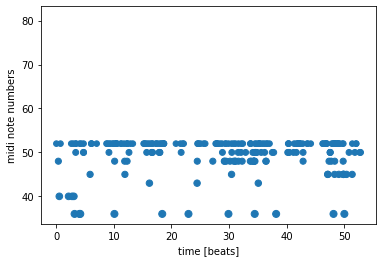

In [22]:
midi_data = []
for i in range(n_mentions):
    note_index = round(map_value(y_data[i], 0, 1, n_notes-1, 0)) 
    #tweets with more mentions are mapped to lower notes
                                                        

plt.scatter(t_data, midi_data, s=50*y_data)
plt.xlabel('time [beats]')
plt.ylabel('midi note numbers')
plt.show()



## 8) Map data to note velocities (map more mentioned tweets to greater velocities)


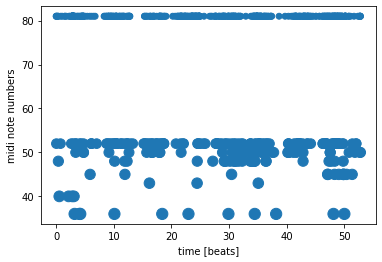

In [23]:
vel_min,vel_max = 35,127   

vel_data = []
for i in range(n_mentions):
    note_velocity = round(map_value(y_data[i], 0, 1, vel_min, vel_max)) #tweets with more mentions will be louder
                                                                
    vel_data.append(note_velocity)
    
plt.scatter(t_data, midi_data, s=vel_data)
plt.xlabel('time [beats]')
plt.ylabel('midi note numbers')
plt.show()

## 9) Save data as MIDI file

In [24]:
from midiutil import MIDIFile #import library to make midi file, https://midiutil.readthedocs.io/en/1.2.1/
    
#create midi file object, add tempo
my_midi_file = MIDIFile(1) #one track 
my_midi_file.addTempo(track=0, time=0, tempo=bpm) 

#add midi notes
for i in range(n_mentions):
    my_midi_file.addNote(track=0, channel=0, pitch=midi_data[i], time=t_data[i], duration=2, volume=vel_data[i])

#create and save the midi file itself
with open(filename + '.mid', "wb") as f:
    my_midi_file.writeFile(f) 


## Optional: Listen to MIDI file within jupyter

In [117]:
import sys 
!{sys.executable} -m pip install --quiet "pygame"  #install pygame with pip
#or use this if you installed python with anaconda
#conda install --yes --prefix {sys.prefix} pygame

import pygame #import library for playing midi files, https://pypi.org/project/pygame/

pygame.init()
pygame.mixer.music.load(filename + '.mid')
pygame.mixer.music.play()



pygame 2.1.2 (SDL 2.0.18, Python 3.9.7)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [ ]:
pygame.mixer.music.stop()